for the sake of faster uploads, environments should be zipped up!
the original environment file was almost 0.9gb, so that would take a while to upload. Definitely can consider uploading the full thing once we're done working on a notebook.

In [ ]:
import dill
dill.load_session('saved_notebook_env/neural_network.db')

In [ ]:
from _Setup import *

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics



In [ ]:
train_data = pd.read_csv(missForestTrainFile)
test_data = pd.read_csv(missForestTestFile)
val_data = pd.read_csv(validationFile)


In [ ]:

x_train = train_data.drop(columns = ['Unnamed: 0','SepsisLabel'])
y_train = train_data['SepsisLabel']
test_data = test_data.drop(columns = ['Unnamed: 0'])
val = val_data.drop(columns = ['Unnamed: 0'])
x_val = val.drop(columns = ['SepsisLabel'])
y_val = val['SepsisLabel']

In [ ]:
#model = tf.keras.models.load_model('nn_regularized.keras')
#model.summary()

# Old models.

In [ ]:
model = Sequential()
model.add(Dense(35, activation = "relu"))
model.add(Dense(20, activation = "relu", kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(Dense(10, activation = "relu", kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs = 25)

In [ ]:
#test_data = test_data.drop(columns = ['Unnamed: 0'])
predictions = model.predict(test_data)
train_predictions = model.predict(x_train)
#binary_predictions = np.where(predictions > 0.5, 1, 0)


In [ ]:
binary_predictions = np.where(predictions > 0.5, 1, 0)
submission_file = pd.read_csv(rawSubmissionFile)
submission_file['SepsisLabel'] = binary_predictions
submission_file.to_csv('neural_submission_test.csv', index = False)
model.save('nn_regularized.keras')

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

# These are working models, in progress.

check model_outputs folder

highf1-nn - had 0.1612 at 0.62 threshold. Auc of 0.79 was high as well. 6 variables removed. Maybe look into this one as next submission?  
highf1-nn_1 also had 0.1703 at 0.69 threshold. AUC 0.77. Removed unit1 and hospadmtime as well. 

best_model_1 is the current best one on kaggle.    


In [166]:
from sklearn.utils import class_weight

In [169]:
class_weight = class_weight.compute_class_weight('balanced', classes = np.unique(y_train), y= y_train)

In [307]:
model = Sequential()
#model.add(tf.keras.Input(batch_size = 128, shape = (26,)))

#model.add(Dense(30, activation = "relu"))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.4))
#model.add(Dense(60, activation = "relu"))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.4))
#model.add(Dense(50, activation = "relu"))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.4)) 
#model.add(Dense(40, activation = "relu"))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.4))
#model.add(Dense(20, activation = "relu"))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.4))
#model.add(Dense(10, activation = "relu"))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.4))
#model.add(Dense(1, activation = "sigmoid"))


model.add(tf.keras.Input(batch_size = 128, shape = (26,)))

model.add(Dense(30, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(Dense(60, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(Dense(30, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(Dense(15, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(Dense(1, activation = "sigmoid"))




In [319]:
x_train_removed = x_train.drop(columns = ['ICULOS','Hgb', 'SBP','DBP','Unit2', 'patient'])
x_val_removed = x_val.drop(columns = ['ICULOS','Hgb', 'SBP','DBP','Unit2','patient'])
test_removed = test_data.drop(columns = ['ICULOS','Hgb', 'SBP','DBP','Unit2','patient'])



# trying out more variables removed. time not a factor and unit room doesn't matter?
#x_train_removed = x_train.drop(columns = ['ICULOS','Hgb', 'SBP','DBP','Unit2', 'patient', 'Unit1','HospAdmTime'])
#x_val_removed = x_val.drop(columns = ['ICULOS','Hgb', 'SBP','DBP','Unit2','patient', 'Unit1','HospAdmTime'])
#test_removed = test_data.drop(columns = ['ICULOS','Hgb', 'SBP','DBP','Unit2','patient', 'Unit1','HospAdmTime'])

In [296]:
x_train_removed.columns

Index(['time', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BaseExcess', 'FiO2',
       'pH', 'PaCO2', 'BUN', 'Calcium', 'Creatinine', 'Glucose', 'Magnesium',
       'Potassium', 'Hct', 'WBC', 'Platelets', 'Age', 'Shock', 'Gender',
       'Fever', 'TCP', 'TCA', 'LEU'],
      dtype='object')

In [265]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_119 (Dense)               │ (128, 30)              │           870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_97          │ (128, 30)              │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_97 (Dropout)            │ (128, 30)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (128, 50)              │         1,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_98          │ (128, 50)              │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_98 (Dropout)            │ (128, 50)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (128, 40)              │         2,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_99          │ (128, 40)              │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_99 (Dropout)            │ (128, 40)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (128, 30)              │         1,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_100         │ (128, 30)              │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_100 (Dropout)           │ (128, 30)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (128, 20)              │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_101         │ (128, 20)              │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_101 (Dropout)           │ (128, 20)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (128, 10)              │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_102         │ (128, 10)              │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_102 (Dropout)           │ (128, 10)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (128, 1)               │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,251 (28.32 KB)

 Trainable params: 6,891 (26.92 KB)

 Non-trainable params: 360 (1.41 KB)

In [308]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=5,
                                              restore_best_weights = True)
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ['BinaryAccuracy', 'f1_score', 'Recall'])
model.fit(x_train_removed, y_train, batch_size=128, epochs = 20, callbacks = [callback], validation_data = (x_val_removed, y_val), class_weight= {'0.0':class_weight[0],'1.0':class_weight[1]})

Epoch 1/20
9344/9344 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - BinaryAccuracy: 0.7365 - Recall: 0.3531 - f1_score: 0.4447 - loss: 0.5417 - val_BinaryAccuracy: 0.9159 - val_Recall: 0.4223 - val_f1_score: 0.0352 - val_loss: 0.2632
Epoch 2/20
9344/9344 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - BinaryAccuracy: 0.7812 - Recall: 0.4788 - f1_score: 0.4446 - loss: 0.4673 - val_BinaryAccuracy: 0.9042 - val_Recall: 0.4450 - val_f1_score: 0.0352 - val_loss: 0.2657
Epoch 3/20
9344/9344 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - BinaryAccuracy: 0.7882 - Recall: 0.5060 - f1_score: 0.4442 - loss: 0.4575 - val_BinaryAccuracy: 0.8953 - val_Recall: 0.4368 - val_f1_score: 0.0352 - val_loss: 568.9484
Epoch 4/20
9344/9344 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - BinaryAccuracy: 0.7897 - Recall: 0.5208 - f1_score: 0.4452 - loss: 0.4541 - val_BinaryAccuracy: 0.8972 - val_Recall: 0.4568 - val_f1_score: 0.0352 - val_loss: 24.6755
Epoch 5/20
9344/9344 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - BinaryAccuracy: 0.7915 - Recall: 0.5193 - f1_sco

6819/6819 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


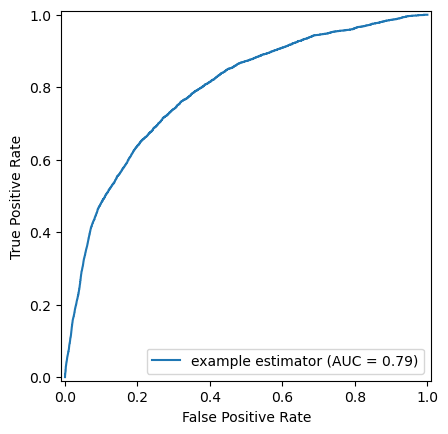

In [ ]:
#predictions = model.predict(test_data_reduced)
val_predictions = model.predict(x_val_removed)


fpr, tpr, thresholds = metrics.roc_curve(y_val, val_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()


In [310]:
thresh = np.arange(0,1,0.01)

f1_list = []
for t in thresh:
    val_binary_predictions = np.where(val_predictions > t, 1, 0)
    f1 = metrics.f1_score(y_val, val_binary_predictions )
    f1_list.append(f1)
    
dict = {"thresh":thresh, "f1":f1_list}


df_f1 = pd.DataFrame(dict)

<Axes: xlabel='thresh'>

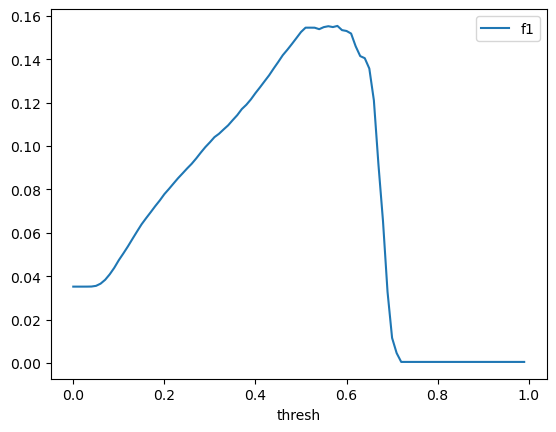

In [311]:
df_f1.plot(x = 'thresh', y = 'f1')

In [312]:
max_index = df_f1['f1'].idxmax()

df_f1.iloc[max_index]

thresh    0.580000
f1        0.155341
Name: 58, dtype: float64

In [314]:
val_binary_predictions = np.where(val_predictions >= 0.58, 1, 0)
print("\nClassification Report (Training):\n", metrics.classification_report(y_val, val_binary_predictions))
f1 = metrics.f1_score(y_val, val_binary_predictions )
print("F1 Score (Training):", f1)


Classification Report (Training):
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97    214293
         1.0       0.10      0.32      0.16      3910

    accuracy                           0.94    218203
   macro avg       0.54      0.63      0.56    218203
weighted avg       0.97      0.94      0.95    218203

F1 Score (Training): 0.15534100755043942


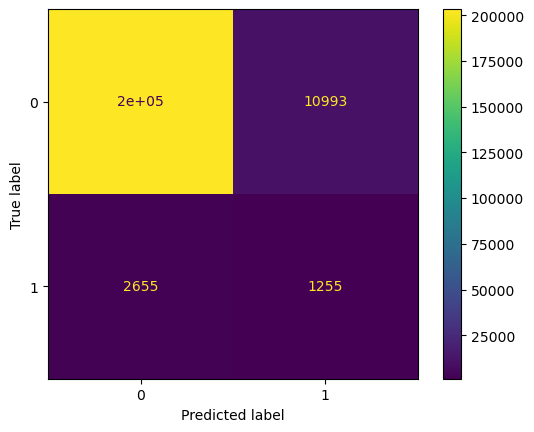

In [315]:
cm = metrics.confusion_matrix(y_val, val_binary_predictions)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()


In [294]:
model.save('model_outputs/highf1-nn_1.keras')

In [255]:
x_val_removed

,time,HR,O2Sat,Temp,MAP,Resp,BaseExcess,FiO2,pH,PaCO2,...,Platelets,Age,HospAdmTime,Shock,Gender,Unit1,Fever,TCP,TCA,LEU
0,-0.799514,0.217097,-1.277278,-0.048235,0.186847,-0.196406,0.046509,0.002929,-0.031332,-0.033990,...,0.092937,0.311809,0.116787,0.099802,1.0,0,0,0,0,0
1,-0.775449,0.217097,-1.277278,-0.048235,0.186847,-0.196406,0.046509,0.002929,-0.031332,-0.033990,...,0.092937,0.311809,0.116787,0.099802,1.0,0,0,0,0,0
2,-0.751383,0.494756,-0.966415,-0.048235,-0.213537,-0.288120,0.046509,0.002929,-0.031332,-0.033990,...,0.092937,0.311809,0.116787,0.676121,1.0,0,0,0,1,0
3,-0.727317,0.550288,-0.344688,-0.048235,0.063652,-0.471547,0.046509,0.002558,-0.031332,-0.033990,...,0.092937,0.311809,0.116787,0.423414,1.0,0,0,0,1,0
4,-0.703251,0.605819,-0.655551,-0.048235,-0.059543,-0.746688,0.046509,-0.002144,-0.029907,-0.037327,...,0.092937,0.311809,0.116787,0.430395,1.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218198,0.066850,0.106034,0.277039,-0.048235,0.002055,-1.847252,0.041224,-0.003650,0.009195,-0.033721,...,-0.866382,0.494168,0.276896,-0.031861,1.0,0,1,1,1,0
218199,0.090916,0.439224,0.277039,-0.048235,0.125250,-1.847252,0.041224,-0.003650,0.009195,-0.033721,...,-0.866382,0.494168,0.276896,-0.049091,1.0,0,1,1,1,0
218200,0.114981,0.217097,-1.277278,-0.678726,0.186847,-1.113542,0.039242,-0.003650,0.013450,-0.031176,...,-0.866382,0.494168,0.276896,0.313027,1.0,0,1,1,1,0
218201,0.139047,-0.005029,0.277039,-0.678726,-0.429128,-2.214106,0.034908,-0.002274,0.012310,0.056433,...,-0.866382,0.494168,0.276896,0.060238,1.0,0,1,1,1,0


In [226]:
complete_trainx = pd.concat([x_train_removed, x_val_removed])
complete_trainy = pd.concat([y_train, y_val])

In [ ]:
model.fit(complete_trainx, complete_trainy, batch_size=256, epochs = 200, callbacks = [callback], class_weight= {'0.0':69999953,'1.0':1.7500029264409795})

TypeError: cannot convert the series to <class 'int'>

6819/6819 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


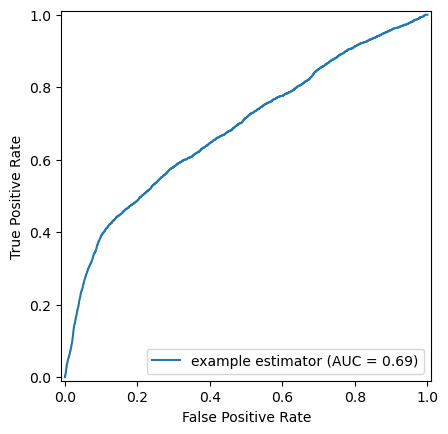

In [129]:
val_predictions = model.predict(x_val_removed)


fpr, tpr, thresholds = metrics.roc_curve(y_val, val_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

In [130]:
thresh = np.arange(0,1,0.01)

f1_list = []
for t in thresh:
    val_binary_predictions = np.where(val_predictions > t, 1, 0)
    f1 = metrics.f1_score(y_val, val_binary_predictions )
    f1_list.append(f1)
    
dict = {"thresh":thresh, "f1":f1_list}


df_f1 = pd.DataFrame(dict)

<Axes: xlabel='thresh'>

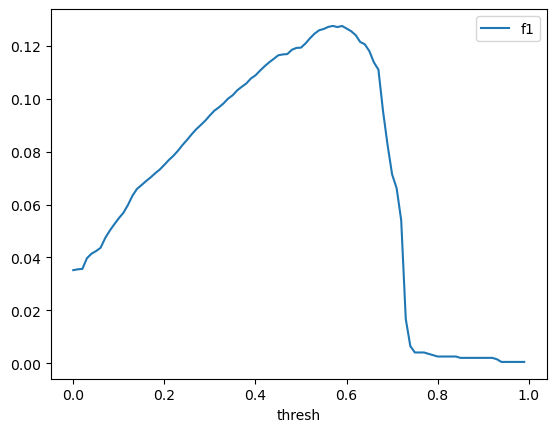

In [131]:
df_f1.plot(x = 'thresh', y = 'f1')

In [132]:
max_index = df_f1['f1'].idxmax()

df_f1.iloc[max_index]

thresh    0.570000
f1        0.127533
Name: 57, dtype: float64

In [137]:
val_binary_predictions = np.where(val_predictions > .57, 1, 0)
print("\nClassification Report (Training):\n", metrics.classification_report(y_val, val_binary_predictions))
f1 = metrics.f1_score(y_val, val_binary_predictions )
print("F1 Score (Training):", f1)


Classification Report (Training):
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97    214293
         1.0       0.09      0.25      0.13      3910

    accuracy                           0.94    218203
   macro avg       0.54      0.60      0.55    218203
weighted avg       0.97      0.94      0.95    218203

F1 Score (Training): 0.12753323867303473


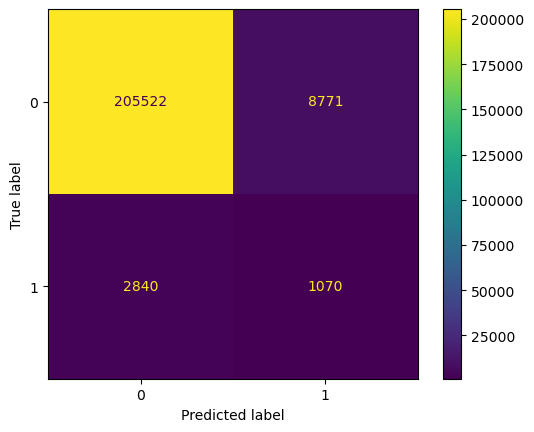

In [202]:
cm = metrics.confusion_matrix(y_val, val_binary_predictions)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()




C:\Users\super\AppData\Local\Temp\ipykernel_37552\3687365271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ids['Unique_ID'] = ids.groupby('patient').cumcount()+1
C:\Users\super\AppData\Local\Temp\ipykernel_37552\3687365271.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ids['ID'] = ids['patient'].astype(str) + '_' + ids['Unique_ID'].astype(str)


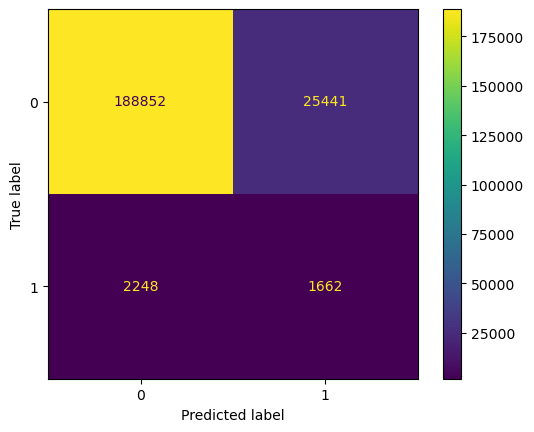

In [256]:
import itertools
from data_functions import subsequent
ids = x_val[['patient']]
ids['Unique_ID'] = ids.groupby('patient').cumcount()+1
ids['ID'] = ids['patient'].astype(str) + '_' + ids['Unique_ID'].astype(str)

ids = ids['ID']

d = {'ID': ids, "SepsisLabel" : list(itertools.chain(*val_binary_predictions))}
t = pd.DataFrame(data = d)


testing = subsequent(t)

cm = metrics.confusion_matrix(y_val, testing['SepsisLabel'])
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()



In [257]:

print("\nClassification Report (Training):\n", metrics.classification_report(y_val, testing['SepsisLabel']))
f1 = metrics.f1_score(y_val, testing['SepsisLabel'] )
print("F1 Score (Training):", f1)


Classification Report (Training):
               precision    recall  f1-score   support

         0.0       0.99      0.88      0.93    214293
         1.0       0.06      0.43      0.11      3910

    accuracy                           0.87    218203
   macro avg       0.52      0.65      0.52    218203
weighted avg       0.97      0.87      0.92    218203

F1 Score (Training): 0.10718085963950601


In [258]:
predictions = model.predict(test_removed)
binary_predictions = np.where(predictions > 0.59, 1, 0)
submission_file = pd.read_csv(rawSubmissionFile)
submission_file['SepsisLabel'] = binary_predictions

#submission_file = subsequent(submission_file)
submission_file.to_csv('model_outputs/neural_submission_test.csv', index = False)

14512/14512 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step


In [237]:
model.save('model_outputs/best_model_1.keras')

# Keeping a tab of the best model at the bottom here.

In [320]:
model_best = tf.keras.models.load_model('model_outputs/best_model_1.keras')
model_best.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_92 (Dense)                │ (1028, 30)             │           870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_74          │ (1028, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (1028, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (1028, 50)             │         1,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_75          │ (1028, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (1028, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (1028, 40)             │         2,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_76          │ (1028, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (1028, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (1028, 25)             │         1,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_77          │ (1028, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (1028, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (1028, 10)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_78          │ (1028, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (1028, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (1028, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,510 (72.31 KB)

 Trainable params: 6,066 (23.70 KB)

 Non-trainable params: 310 (1.21 KB)

 Optimizer params: 12,134 (47.40 KB)

In [ ]:
x_train_removed = x_train.drop(columns = ['ICULOS','Hgb', 'SBP','DBP','Unit2', 'patient'])
x_val_removed = x_val.drop(columns = ['ICULOS','Hgb', 'SBP','DBP','Unit2','patient'])
test_removed = test_data.drop(columns = ['ICULOS','Hgb', 'SBP','DBP','Unit2','patient'])


6819/6819 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


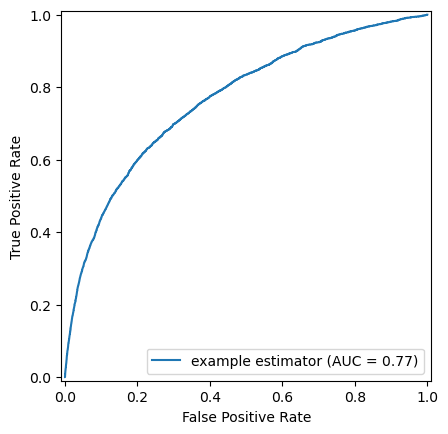

In [321]:
#predictions = model.predict(test_data_reduced)
val_predictions = model_best.predict(x_val_removed)


fpr, tpr, thresholds = metrics.roc_curve(y_val, val_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

In [322]:
thresh = np.arange(0,1,0.01)

f1_list = []
for t in thresh:
    val_binary_predictions = np.where(val_predictions > t, 1, 0)
    f1 = metrics.f1_score(y_val, val_binary_predictions )
    f1_list.append(f1)
    
dict = {"thresh":thresh, "f1":f1_list}


df_f1 = pd.DataFrame(dict)

<Axes: xlabel='thresh'>

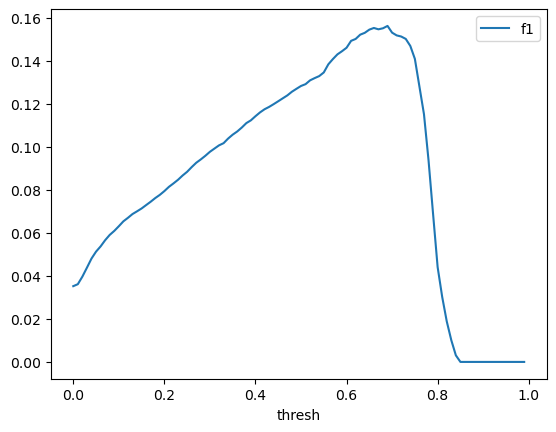

In [323]:
df_f1.plot(x = 'thresh', y = 'f1')

In [324]:
max_index = df_f1['f1'].idxmax()

df_f1.iloc[max_index]

thresh    0.69000
f1        0.15612
Name: 69, dtype: float64

In [325]:
val_binary_predictions = np.where(val_predictions >= 0.69, 1, 0)
print("\nClassification Report (Training):\n", metrics.classification_report(y_val, val_binary_predictions))
f1 = metrics.f1_score(y_val, val_binary_predictions )
print("F1 Score (Training):", f1)


Classification Report (Training):
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98    214293
         1.0       0.11      0.24      0.16      3910

    accuracy                           0.95    218203
   macro avg       0.55      0.61      0.57    218203
weighted avg       0.97      0.95      0.96    218203

F1 Score (Training): 0.1561198660896546


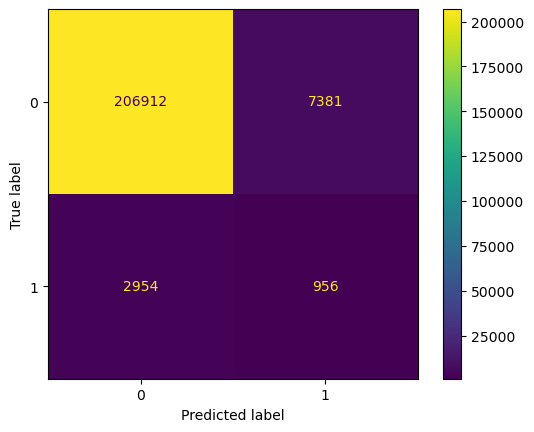

In [326]:
cm = metrics.confusion_matrix(y_val, val_binary_predictions)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()


# Trying out different dropout rates

In [ ]:
submission_file

In [ ]:
submission_file[['patient_id', 'time']] = submission_file['ID'].str.split('_', expand=True)
submission_file['time'] = submission_file['time'].astype(int)


# Apply the rule: if there's a 1 at any time point, set all later values to 1 for that patient
submission_file['SepsisLabel'] = submission_file.groupby('patient_id')['SepsisLabel'].transform(lambda x: x.cumsum().clip(upper=1))

# Combine patient ID and time back into a single column if needed
submission_file['patient_time'] = submission_file['patient_id'] + '_' + submission_file['time'].astype(str)
submission_file = submission_file[['ID','SepsisLabel']]


In [ ]:
submission_file.iloc[6381:6391]

In [ ]:
def create_model(dropout):
    model = Sequential()
    model.add(Dense(30, activation = "relu" ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(Dense(25, activation = "relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(Dense(20, activation = "relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(Dense(4, activation = "relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(Dense(1, activation = "sigmoid"))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=10)

model = create_model(0.1)
model.fit(x_train, y_train, batch_size=1028, epochs = 100, callbacks = [callback])
train_predictions = model.predict(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
train_binary_predictions = np.where(train_predictions > 0.5, 1, 0)
print("\nClassification Report (Training):\n", metrics.classification_report(y_train, train_binary_predictions))
f1 = metrics.f1_score(y_train, train_binary_predictions )
print("F1 Score (Training):", f1)



In [ ]:
model.save('model_outputs/nn_dropout_01.keras')

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=10)

model = create_model(0.2)
model.fit(x_train, y_train, batch_size=1028, epochs = 100, callbacks = [callback])
train_predictions = model.predict(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
train_binary_predictions = np.where(train_predictions > 0.5, 1, 0)
print("\nClassification Report (Training):\n", metrics.classification_report(y_train, train_binary_predictions))
f1 = metrics.f1_score(y_train, train_binary_predictions )
print("F1 Score (Training):", f1)


In [ ]:
model.save('model_outputs/nn_dropout_02.keras')

In [ ]:
model = create_model(0.3)
model.fit(x_train, y_train, batch_size=1028, epochs = 100, callbacks = [callback])
train_predictions = model.predict(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
train_binary_predictions = np.where(train_predictions > 0.5, 1, 0)
print("\nClassification Report (Training):\n", metrics.classification_report(y_train, train_binary_predictions))
f1 = metrics.f1_score(y_train, train_binary_predictions )
print("F1 Score (Training):", f1)

In [ ]:
model.save('model_outputs/nn_dropout_03.keras')

Looks like dropout rate of 0.1 seems to do best? Let's look at other hyperparameters.

In [ ]:
def create_model_():
    model = Sequential()
    model.add(Dense(30, activation = "relu", ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(Dense(25, activation = "relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(Dense(20, activation = "relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(Dense(4, activation = "relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(Dense(1, activation = "sigmoid"))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier


This one will target batch size and epochs.

In [ ]:
def create_model():
	model = Sequential()
	model.add(Dense(30, activation = "relu"))
	model.add(Dense(20, activation = "relu"))
	model.add(Dense(10, activation = "relu"))
	model.add(Dense(4, activation = "relu"))
	model.add(Dense(1, activation = "sigmoid"))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
seed = 5
tf.random.set_seed(seed)
model= KerasClassifier(model = create_model, n_outputs_expected_ = 1, verbose = 0)

batch_size = [10,20,40,60,80,100]
epochs = [25,50,75]

param_grid = dict(batch_size= batch_size, epochs=epochs)

grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs= -1, cv=5)
grid_result= grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
dill.dump_session('saved_notebook_env/neural_network.db')